<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

<h1 align="center"><font size="5">Final Project: Classification with Python</font></h1>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="https://#Section_1">Instructions</a></li>
    <li><a href="https://#Section_2">About the Data</a></li>
    <li><a href="https://#Section_3">Importing Data </a></li>
    <li><a href="https://#Section_4">Data Preprocessing</a> </li>
    <li><a href="https://#Section_5">One Hot Encoding </a></li>
    <li><a href="https://#Section_6">Train and Test Data Split </a></li>
    <li><a href="https://#Section_7">Train Logistic Regression, KNN, Decision Tree, SVM, and Linear Regression models and return their appropriate accuracy scores</a></li>
</a></li>
</div>
<p>Estimated Time Needed: <strong>180 min</strong></p>
</div>

<hr>


# Instructions


In this notebook, you will  practice all the classification algorithms that we have learned in this course.


Below, is where we are going to use the classification algorithms to create a model based on our training data and evaluate our testing data using evaluation metrics learned in the course.

We will use some of the algorithms taught in the course, specifically:

1. Linear Regression
2. KNN
3. Decision Trees
4. Logistic Regression
5. SVM

We will evaluate our models using:

1.  Accuracy Score
2.  Jaccard Index
3.  F1-Score
4.  LogLoss
5.  Mean Absolute Error
6.  Mean Squared Error
7.  R2-Score

Finally, you will use your models to generate the report at the end. 


# About The Dataset


The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)




This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)



## **Import the required libraries**


In [4]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
!mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

/bin/bash: line 1: mamba: command not found


In [75]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [76]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

### Importing the Dataset


> Note: This version of the lab is designed for JupyterLite, which necessitates downloading the dataset to the interface. However, when working with the downloaded version of this notebook on your local machines (Jupyter Anaconda), you can simply **skip the steps above of "Importing the Dataset"** and use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [77]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv"
df = pd.read_csv(filepath)

In [78]:
# Set pandas options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [79]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,17,20,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,9,13,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,17,2,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,22,20,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,11,6,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


### Data Preprocessing


#### One Hot Encoding


First, we need to perform one hot encoding to convert categorical variables to binary variables.


In [80]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.


In [81]:
df_sydney_processed.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,RainToday_No,RainToday_Yes,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,41,17,20,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,41,9,13,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,41,17,2,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,41,22,20,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,41,11,6,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [82]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)
df_sydney_processed.replace(['False', 'True'], [0,1], inplace=True)

Displaying the column names after the one hot encoding 

In [83]:
df_sydney_processed.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainTomorrow', 'RainToday_No', 'RainToday_Yes',
       'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N',
       'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE',
       'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW',
       'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE',
       'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW',
       'WindDir9am_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE',
       'WindDir3

In [84]:
df_sydney_processed.dtypes

Date                object
MinTemp            float64
MaxTemp            float64
Rainfall           float64
Evaporation        float64
Sunshine           float64
WindGustSpeed        int64
WindSpeed9am         int64
WindSpeed3pm         int64
Humidity9am          int64
Humidity3pm          int64
Pressure9am        float64
Pressure3pm        float64
Cloud9am             int64
Cloud3pm             int64
Temp9am            float64
Temp3pm            float64
RainTomorrow         int64
RainToday_No          bool
RainToday_Yes         bool
WindGustDir_E         bool
WindGustDir_ENE       bool
WindGustDir_ESE       bool
WindGustDir_N         bool
WindGustDir_NE        bool
WindGustDir_NNE       bool
WindGustDir_NNW       bool
WindGustDir_NW        bool
WindGustDir_S         bool
WindGustDir_SE        bool
WindGustDir_SSE       bool
WindGustDir_SSW       bool
WindGustDir_SW        bool
WindGustDir_W         bool
WindGustDir_WNW       bool
WindGustDir_WSW       bool
WindDir9am_E          bool
W

### Training Data and Test Data


Now, we set our 'features' or x values and our Y or target variable.


In [85]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [86]:
df_sydney_processed = df_sydney_processed.astype(float)

In [87]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

### Linear Regression


#### Q1) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `10`.


In [88]:
#Enter Your Code and Execute



In [89]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10)

#### Q2) Create and train a Linear Regression model called LinearReg using the training data (`x_train`, `y_train`).


In [90]:
#Enter Your Code and Execute
regr = LinearRegression()

In [91]:
LinearReg = regr.fit (x_train, y_train)
print ('Coefficients: ', regr.coef_)

Coefficients:  [-0.02369173  0.01300554  0.00072981  0.00649077 -0.03516427  0.00423762
  0.0018292   0.00078986  0.00095609  0.00856061  0.00769793 -0.00924424
 -0.00887454  0.01004774  0.01446555 -0.00348065 -0.05402493  0.05402493
  0.05039419 -0.07898527  0.06640003 -0.0721012  -0.05945626 -0.08239011
 -0.0789619   0.06418738 -0.00838878  0.11105128  0.01414852  0.03851666
  0.03625722 -0.02133122  0.00395909  0.01670037  0.04350405  0.05317842
 -0.00692976 -0.01911823 -0.01461142 -0.00594829 -0.07546046  0.04176858
 -0.00758587 -0.00980346 -0.01874997  0.00302978  0.01914623 -0.0012425
 -0.01756641  0.01638932 -0.09330032 -0.08339081 -0.01838672 -0.05191842
 -0.04092463  0.03423083  0.06883841  0.01862747  0.06892422  0.00033817
 -0.04820507  0.0755034   0.03967488  0.02636872 -0.02236214  0.02598199]


#### Q3) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [92]:
#Enter Your Code and Execute

In [93]:
predictions = LinearReg.predict(x_test)
predictions[:10]

array([0.13184071, 0.2761859 , 0.97818819, 0.2874561 , 0.13241371,
       0.46046418, 0.35678746, 0.85640685, 0.67501191, 0.03824739])

#### Q4) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [94]:
#Enter Your Code and Execute


In [95]:
LinearRegression_MAE = metrics.mean_absolute_error(y_test, predictions)
LinearRegression_MSE = metrics.mean_squared_error(y_test, predictions)
LinearRegression_R2 = metrics.r2_score(y_test, predictions)

#### Q5) Show the MAE, MSE, and R2 in a tabular format using data frame for the linear model.


In [96]:
#Enter Your Code and Execute

In [97]:
Report = pd.DataFrame({
    'Metrics': ['LinearRegression_MAE', 'LinearRegression_MSE', 'LinearRegression_R2'],
    'Value': [LinearRegression_MAE, LinearRegression_MSE, LinearRegression_R2]
})
Report

,Metrics,Value
0,LinearRegression_MAE,0.256318
1,LinearRegression_MSE,0.115721
2,LinearRegression_R2,0.427132


### KNN


#### Q6) Create and train a KNN model called KNN using the training data (`x_train`, `y_train`) with the `n_neighbors` parameter set to `4`.


In [28]:
#Enter Your Code and Execute
#


In [29]:
KNN = KNeighborsClassifier(n_neighbors = 4).fit(x_train,y_train)


#### Q7) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [30]:
#Enter Your Code and Execute

In [31]:
predictions = KNN.predict(x_test)

#### Q8) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [32]:
#Enter Your Code and Execute

In [33]:
KNN_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
KNN_JaccardIndex = metrics.jaccard_score(y_test, predictions)
KNN_F1_Score = metrics.f1_score(y_test, predictions)

In [34]:
knn_metrics = pd.DataFrame({
    'Metrics': ['KNN Accuracy Score', 'KNN Jaccard Index', 'KNN F1 Score'],
    'Value': [KNN_Accuracy_Score, KNN_JaccardIndex, KNN_F1_Score]
})
knn_metrics

,Metrics,Value
0,KNN Accuracy Score,0.818321
1,KNN Jaccard Index,0.425121
2,KNN F1 Score,0.596610


In [35]:
 X = preprocessing.StandardScaler().fit(features).transform(features.astype(float))

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [37]:
KNN = KNeighborsClassifier(n_neighbors = 4).fit(x_train,y_train)


In [38]:
predictions = KNN.predict(x_test)
predictions[:15]

array([0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.])

In [39]:
KNN_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
KNN_JaccardIndex = metrics.jaccard_score(y_test, predictions)
KNN_F1_Score = metrics.f1_score(y_test, predictions)

In [40]:
knn_metrics = pd.DataFrame({
    'Metrics': ['KNN Accuracy Score', 'KNN Jaccard Index', 'KNN F1 Score'],
    'Value': [KNN_Accuracy_Score, KNN_JaccardIndex, KNN_F1_Score]
})
knn_metrics

,Metrics,Value
0,KNN Accuracy Score,0.760305
1,KNN Jaccard Index,0.241546
2,KNN F1 Score,0.389105


### Decision Tree


#### Q9) Create and train a Decision Tree model called Tree using the training data (`x_train`, `y_train`).


In [41]:
#Enter Your Code and Execute

In [42]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

#### Q10) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [43]:
#Enter Your Code and Execute

In [44]:
predictions = Tree.predict(x_test)

#### Q11) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [45]:
#Enter Your Code and Execute

In [46]:
Tree_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
Tree_JaccardIndex = metrics.jaccard_score(y_test, predictions)
Tree_F1_Score = metrics.f1_score(y_test, predictions)

In [47]:
Tree_metrics = pd.DataFrame({
    'Metrics': ['Tree Accuracy Score', 'Tree Jaccard Index', 'Tree F1 Score'],
    'Value': [Tree_Accuracy_Score, Tree_JaccardIndex, Tree_F1_Score]
})
Tree_metrics

,Metrics,Value
0,Tree Accuracy Score,0.818321
1,Tree Jaccard Index,0.480349
2,Tree F1 Score,0.648968


### Logistic Regression


#### Q12) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `1`.


In [48]:
#Enter Your Code and Execute

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

#### Q13) Create and train a LogisticRegression model called LR using the training data (`x_train`, `y_train`) with the `solver` parameter set to `liblinear`.


In [50]:
#Enter Your Code and Execute

In [51]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)


#### Q14) Now, use the `predict` and `predict_proba` methods on the testing data (`x_test`) and save it as 2 arrays `predictions` and `predict_proba`.


In [52]:
#Enter Your Code and Execute

In [53]:
predictions = LR.predict(x_test)

In [54]:
predict_proba = LR.predict_proba(x_test)

#### Q15) Using the `predictions`, `predict_proba` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [55]:
#Enter Your Code and Execute

In [56]:
LR_Accuracy_Score = accuracy_score(y_test, predictions)

# Calculate Jaccard Index (weighted for multi-class problems)
LR_JaccardIndex = jaccard_score(y_test, predictions, average='weighted')

# Calculate F1 Score (weighted for multi-class problems)
LR_F1_Score = f1_score(y_test, predictions, average='weighted')

# Calculate Log Loss
LR_Log_Loss = log_loss(y_test, predict_proba)

In [57]:
lg_metrics = pd.DataFrame({
    'Metrics': ['Logistic Regression Accuracy Score', 'Logistic Regression Jaccard Index', 
                'Logistic Regression F1 Score', 'Logistic Regression Log Loss'],
    'Value': [LR_Accuracy_Score, LR_JaccardIndex, LR_F1_Score, LR_Log_Loss]
})
lg_metrics

,Metrics,Value
0,Logistic Regression Accuracy Score,0.825954
1,Logistic Regression Jaccard Index,0.709224
2,Logistic Regression F1 Score,0.822696
3,Logistic Regression Log Loss,0.388603


### SVM


#### Q16) Create and train a SVM model called SVM using the training data (`x_train`, `y_train`).


In [58]:
distinct_values =df_sydney_processed['RainTomorrow'].unique()
distinct_values
print(df_sydney_processed.columns)


Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainTomorrow', 'RainToday_No', 'RainToday_Yes',
       'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N',
       'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE',
       'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW',
       'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE',
       'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW',
       'WindDir9am_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE',
       'WindDir3pm_N', '

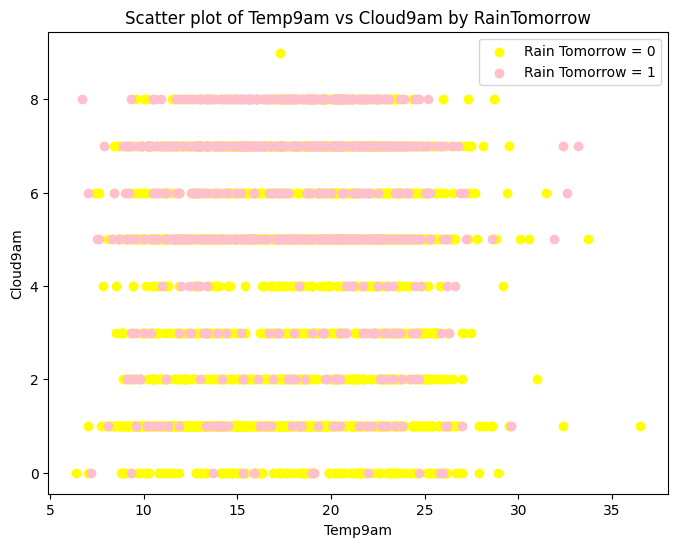

In [59]:
#Enter Your Code and Execute
# Filter data for RainTomorrow == 0 and RainTomorrow == 1
import matplotlib.pyplot as plt

rain_tomorrow_0 = df_sydney_processed[df_sydney_processed['RainTomorrow'] == 0]
rain_tomorrow_1 = df_sydney_processed[df_sydney_processed['RainTomorrow'] == 1]

# Plot scatter plot
plt.figure(figsize=(8, 6))

plt.scatter(rain_tomorrow_0['Temp9am'], rain_tomorrow_0['Cloud9am'], color='yellow', label='Rain Tomorrow = 0')
plt.scatter(rain_tomorrow_1['Temp9am'], rain_tomorrow_1['Cloud9am'], color='pink', label='Rain Tomorrow = 1')

plt.xlabel('Temp9am')
plt.ylabel('Cloud9am')
plt.title('Scatter plot of Temp9am vs Cloud9am by RainTomorrow')
plt.legend()

plt.show()

In [60]:
SVM = svm.SVC(kernel='rbf')
SVM.fit(x_train, y_train) 

SVC()

#### Q17) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [61]:
#Enter Your Code and Execute

In [62]:
predictions = SVM.predict(x_test)

#### Q18) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [63]:
SVM_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
SVM_JaccardIndex = metrics.jaccard_score(y_test, predictions, average='weighted')
SVM_F1_Score = metrics.f1_score(y_test, predictions, average='weighted')

In [64]:
svm_metrics = pd.DataFrame({
    'Metrics': ['SVM Accuracy_Score', 'SVM JaccardIndex','SVM F1_Score'],
    'Value': [SVM_Accuracy_Score, SVM_JaccardIndex, SVM_F1_Score]
})
svm_metrics

,Metrics,Value
0,SVM Accuracy_Score,0.829008
1,SVM JaccardIndex,0.706601
2,SVM F1_Score,0.818241


### Report


#### Q19) Show the Accuracy,Jaccard Index,F1-Score and LogLoss in a tabular format using data frame for all of the above models.

\*LogLoss is only for Logistic Regression Model


In [100]:
# Report = Report[0:0]
# Report = Report.drop(columns=Report.columns)
Report = pd.concat([Report,knn_metrics, Tree_metrics, lg_metrics,svm_metrics],ignore_index=True)
Report.reset_index(drop=True, inplace=True)
Report = Report.sort_values(by='Value',ascending=False)
Report

,Metrics,Value
10,SVM Accuracy_Score,0.829008
6,Logistic Regression Accuracy Score,0.825954
8,Logistic Regression F1 Score,0.822696
3,Tree Accuracy Score,0.818321
12,SVM F1_Score,0.818241
0,KNN Accuracy Score,0.760305
7,Logistic Regression Jaccard Index,0.709224
11,SVM JaccardIndex,0.706601
5,Tree F1 Score,0.648968
4,Tree Jaccard Index,0.480349


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

### Other Contributors

[Svitlana Kramar](https://www.linkedin.com/in/svitlana-kramar/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01)


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description          |
| ----------------- | ------- | ------------- | --------------------------- |
| 2022-06-22        | 2.0     | Svitlana K.   | Deleted GridSearch and Mock |

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
